<a href="https://colab.research.google.com/github/lakshmy1234/Face-mask-recognition/blob/main/face_mask__classi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMAGE CLASSIFICATION**

**Face Mask Detection using SVM Algorithm**




In [1]:
# importing the necessary packages

import numpy as np
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread,imshow 

In [2]:
# listdir lists the contents of the specified directory.

os.listdir("/content/drive/MyDrive/Datasets/Mask Data")

['with_mask', 'without_mask', 'mask_face1.jpg', 'unmasked1.jpg']

In [3]:
len(os.listdir("/content/drive/MyDrive/Datasets/Mask Data/with_mask"))

3725

In [4]:
len(os.listdir("/content/drive/MyDrive/Datasets/Mask Data/without_mask"))

3828

In [5]:
# creating arrays for reading the images to train the dataset

data_arr=[]
target_arr=[]
categories=["with_mask","without_mask"]

*The given code reads every image in the dataset and store it in the array **'img_arr'** and then resize every image to a generalised size.* 

*The resized images are then stored to the array **'data_arr'** and target values to the **'target_arr'**.* 

In [6]:
datadir="/content/drive/MyDrive/Datasets/Mask Data"

for i in categories:
  print("loading......",i)
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_arr=imread(os.path.join(path,img))
    img_resized=resize(img_arr,(75,75,3))
    data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
  print("loadedd....",i)

loading...... with_mask
loadedd.... with_mask
loading...... without_mask
loadedd.... without_mask


In [7]:
# creating a dataframe for the image arrays

df=pd.DataFrame(data_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,16865,16866,16867,16868,16869,16870,16871,16872,16873,16874
0,0.301961,0.298039,0.282353,0.301961,0.298039,0.286275,0.305882,0.301961,0.286275,0.317647,...,0.650980,0.650980,0.650980,0.651033,0.643163,0.647059,0.650980,0.639216,0.643137,0.649046
1,0.929412,0.929412,0.921569,0.929412,0.929412,0.921569,0.933333,0.933333,0.925490,0.933333,...,0.431373,0.513725,0.470588,0.423529,0.505882,0.462745,0.415686,0.498039,0.453617,0.407843
2,0.439216,0.419608,0.403922,0.439216,0.419608,0.403922,0.431373,0.411765,0.400000,0.435294,...,0.000000,0.003922,0.003922,0.004248,0.019608,0.019608,0.027451,0.031373,0.031373,0.041176
3,0.188235,0.235294,0.282353,0.188235,0.235294,0.282353,0.192157,0.239216,0.286275,0.200000,...,0.168261,0.144915,0.164340,0.172366,0.152758,0.168444,0.180030,0.175190,0.190876,0.202641
4,0.509403,0.513725,0.462745,0.503922,0.504680,0.456863,0.404784,0.400863,0.352540,0.391756,...,0.372549,0.405839,0.372549,0.345098,0.374065,0.345098,0.317647,0.344697,0.318911,0.298039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,0.636471,0.569804,0.507059,0.636471,0.569804,0.507059,0.636471,0.569804,0.507059,0.637359,...,0.219974,0.475608,0.330510,0.216784,0.472910,0.327812,0.214086,0.479608,0.334510,0.220784
7549,0.976471,0.956863,0.933333,0.976471,0.956863,0.933333,0.976471,0.956863,0.933333,0.976471,...,0.105882,0.119216,0.119216,0.119216,0.134588,0.134588,0.134588,0.114719,0.114719,0.114719
7550,0.007111,0.003190,0.000000,0.151598,0.147677,0.139834,0.212575,0.208654,0.200810,0.207843,...,0.456915,0.530717,0.482902,0.464105,0.358614,0.319869,0.326797,0.022065,0.003190,0.006379
7551,0.678013,0.548601,0.388235,0.684601,0.556444,0.396078,0.689778,0.562419,0.403698,0.690771,...,0.158796,0.376690,0.266886,0.239017,0.441748,0.329562,0.301693,0.424897,0.315556,0.275503


In [8]:
# adding the target values to the data frame 

df['target']=(target_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,16866,16867,16868,16869,16870,16871,16872,16873,16874,target
0,0.301961,0.298039,0.282353,0.301961,0.298039,0.286275,0.305882,0.301961,0.286275,0.317647,...,0.650980,0.650980,0.651033,0.643163,0.647059,0.650980,0.639216,0.643137,0.649046,0
1,0.929412,0.929412,0.921569,0.929412,0.929412,0.921569,0.933333,0.933333,0.925490,0.933333,...,0.513725,0.470588,0.423529,0.505882,0.462745,0.415686,0.498039,0.453617,0.407843,0
2,0.439216,0.419608,0.403922,0.439216,0.419608,0.403922,0.431373,0.411765,0.400000,0.435294,...,0.003922,0.003922,0.004248,0.019608,0.019608,0.027451,0.031373,0.031373,0.041176,0
3,0.188235,0.235294,0.282353,0.188235,0.235294,0.282353,0.192157,0.239216,0.286275,0.200000,...,0.144915,0.164340,0.172366,0.152758,0.168444,0.180030,0.175190,0.190876,0.202641,0
4,0.509403,0.513725,0.462745,0.503922,0.504680,0.456863,0.404784,0.400863,0.352540,0.391756,...,0.405839,0.372549,0.345098,0.374065,0.345098,0.317647,0.344697,0.318911,0.298039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,0.636471,0.569804,0.507059,0.636471,0.569804,0.507059,0.636471,0.569804,0.507059,0.637359,...,0.475608,0.330510,0.216784,0.472910,0.327812,0.214086,0.479608,0.334510,0.220784,1
7549,0.976471,0.956863,0.933333,0.976471,0.956863,0.933333,0.976471,0.956863,0.933333,0.976471,...,0.119216,0.119216,0.119216,0.134588,0.134588,0.134588,0.114719,0.114719,0.114719,1
7550,0.007111,0.003190,0.000000,0.151598,0.147677,0.139834,0.212575,0.208654,0.200810,0.207843,...,0.530717,0.482902,0.464105,0.358614,0.319869,0.326797,0.022065,0.003190,0.006379,1
7551,0.678013,0.548601,0.388235,0.684601,0.556444,0.396078,0.689778,0.562419,0.403698,0.690771,...,0.376690,0.266886,0.239017,0.441748,0.329562,0.301693,0.424897,0.315556,0.275503,1


In [9]:
# defining the input and output datas

X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
X

array([[0.30196078, 0.29803922, 0.28235294, ..., 0.63921569, 0.64313725,
        0.64904575],
       [0.92941176, 0.92941176, 0.92156863, ..., 0.49803922, 0.45361656,
        0.40784314],
       [0.43921569, 0.41960784, 0.40392157, ..., 0.03137255, 0.03137255,
        0.04117647],
       ...,
       [0.00711111, 0.00318954, 0.        , ..., 0.02206536, 0.00318954,
        0.00637908],
       [0.67801307, 0.54860131, 0.38823529, ..., 0.42489656, 0.31555556,
        0.27550327],
       [0.33508148, 0.40174815, 0.4331207 , ..., 0.28977778, 0.35252288,
        0.30154248]])

In [10]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
# splitting the dataset to training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)
x_train

array([[0.36204096, 0.31372898, 0.32225011, ..., 0.31010545, 0.2311512 ,
        0.1953342 ],
       [0.98431373, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.56078431, 0.44682353,
        0.31764706],
       ...,
       [0.87843137, 0.80437821, 0.76862745, ..., 0.1332671 , 0.12934553,
        0.19209063],
       [0.87079303, 0.77667538, 0.66687146, ..., 0.80452723, 0.5966841 ,
        0.43982135],
       [1.        , 1.        , 1.        , ..., 0.73333333, 0.54117647,
        0.4745098 ]])

In [13]:
x_test

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.18322196, 0.14400627, 0.17537882, ..., 0.48660078, 0.46374484,
        0.46307137],
       [0.92237908, 0.94291869, 0.93943425, ..., 0.08972549, 0.16781699,
        0.21694118],
       ...,
       [1.        , 1.        , 1.        , ..., 0.14117647, 0.13333333,
        0.14117647],
       [0.44050963, 0.31445403, 0.28855216, ..., 0.22582031, 0.14738893,
        0.1513105 ],
       [0.73254902, 0.79388235, 0.78666667, ..., 0.51639216, 0.57552941,
        0.60847059]])

In [14]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [15]:
y_test

array([0, 0, 1, ..., 1, 0, 1])

In [16]:
# SVM Algorithm

from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

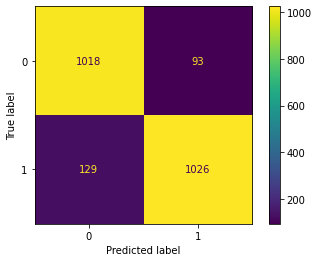

In [17]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
matrix=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(matrix)

In [18]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9020300088261254


In [19]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1111
           1       0.92      0.89      0.90      1155

    accuracy                           0.90      2266
   macro avg       0.90      0.90      0.90      2266
weighted avg       0.90      0.90      0.90      2266



In [20]:
maskpath="/content/drive/MyDrive/Datasets/Mask Data/mask_face1.jpg"
img1=imread(maskpath)
img1resize=resize(img1,(75,75,3)).flatten().reshape(1,-1)
classifier.predict(img1resize)

array([0])

*Hence, the new image has been classified to the category **'0'** which means the image belongs to a masked face. Clearly, the displayed image below proves the prediction to be correct.*

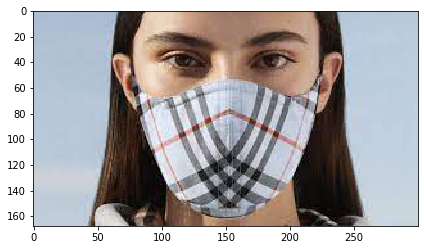

In [21]:
from skimage import io
io.imshow(img1)

In [22]:
unmaskpath="/content/drive/MyDrive/Datasets/Mask Data/unmasked1.jpg"
img2=imread(unmaskpath)
img2resize=resize(img2,(75,75,3)).flatten().reshape(1,-1)
classifier.predict(img2resize)

array([1])

*Hence, the new image has been classified to the category **'1'** which means the image belongs to an unmasked face.Clearly, the displayed image below proves the prediction to be correct.* 

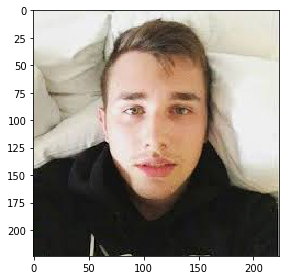

In [23]:
io.imshow(img2)